
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset preparation

In [2]:
import pandas as pd

ds_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train (1).csv')
ds_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test (1).csv')

In [3]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [4]:
ds_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
ds_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
ds_train.drop('location', axis=1, inplace=True)

In [7]:
ds_train.shape

(7613, 4)

In [8]:
ds_train.dropna(inplace=True)

In [9]:
ds_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [10]:
%pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [11]:
ds_train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
ds_train['keyword'] = le.fit_transform(ds_train['keyword'])

In [14]:
ds_train

,id,keyword,text,target
31,48,0,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,0,We always try to bring the heavy. #metal #RT h...,0
33,50,0,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,0,Crying out for more! Set me ablaze,0
35,53,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
7578,10830,220,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,220,Three days off from work and they've pretty mu...,0
7580,10832,220,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,220,@engineshed Great atmosphere at the British Li...,0


#Part1

#Model 1

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [16]:
tokenizer1 = AutoTokenizer.from_pretrained('bert-base-uncased')

In [17]:
ds_train.rename(columns={'target': 'label'}, inplace=True)

In [18]:
from datasets import Dataset

In [19]:
dataset = Dataset.from_pandas(ds_train)
enc_train = dataset.map(lambda x: tokenizer1(x['text'], truncation=True, padding=True), batched=True)


  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

In [21]:
enc_train

Dataset({
    features: ['id', 'keyword', 'text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 7552
})

In [22]:
from transformers import TrainingArguments, Trainer


In [23]:
arg1 = TrainingArguments(
    output_dir="/content",
    learning_rate=5e-5,
    num_train_epochs=1,
    per_device_eval_batch_size=8,
    per_device_train_batch_size=36,
    seed=19
)

In [24]:
trainer1 = Trainer(
    model=model1,
    args=arg1,
    tokenizer=tokenizer1,
    train_dataset=enc_train
)

In [25]:
trainer1.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, text, keyword, id. If __index_level_0__, text, keyword, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 1
  Instantaneous batch size per device = 36
  Total train batch size (w. parallel, distributed & accumulation) = 36
  Gradient Accumulation steps = 1
  Total optimization steps = 210
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast toke

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=210, training_loss=0.434294673374721, metrics={'train_runtime': 117.6339, 'train_samples_per_second': 64.199, 'train_steps_per_second': 1.785, 'total_flos': 325883597614560.0, 'train_loss': 0.434294673374721, 'epoch': 1.0})

In [26]:
ds_test.drop('location',axis=1, inplace=True)
ds_test.drop('keyword', axis=1, inplace=True)

In [27]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [28]:
ds_test = pd.concat([ds_test['text'], sample], axis=1)

In [29]:
ds_test.columns = ['text','id','label']

In [30]:
ds_test

,text,id,label
0,Just happened a terrible car crash,0,0
1,"Heard about #earthquake is different cities, s...",2,0
2,"there is a forest fire at spot pond, geese are...",3,0
3,Apocalypse lighting. #Spokane #wildfires,9,0
4,Typhoon Soudelor kills 28 in China and Taiwan,11,0
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,10861,0
3259,Storm in RI worse than last hurricane. My city...,10865,0
3260,Green Line derailment in Chicago http://t.co/U...,10868,0
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,10874,0


In [31]:
dataset = Dataset.from_pandas(ds_test)
enc_test = dataset.map(lambda x: tokenizer1(x['text'], truncation=True, padding=True), batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

In [32]:
y_pred = trainer1.predict(enc_test)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


# model 1 - prediction

In [33]:
y_pred1 = y_pred.predictions

In [34]:
import numpy as np

In [35]:
y_pred1 = [np.argmax(y_pred1[i]) for i in range(0,len(y_pred1))]

In [36]:
from sklearn.metrics import classification_report,f1_score
model1_score = f1_score(ds_test['label'],y_pred1,average='macro')

In [37]:
print(classification_report(ds_test['label'],y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.61      3263
   macro avg       0.50      0.31      0.38      3263
weighted avg       1.00      0.61      0.76      3263



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Model 2 

In [38]:
from transformers import XLMForSequenceClassification

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [ ]:
model2 = XLMForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=2)

In [41]:
dataset = Dataset.from_pandas(ds_train)
enc_train = dataset.map(lambda x: tokenizer2(x['text'], truncation=True, padding=True), batched=True)

dataset = Dataset.from_pandas(ds_test)
enc_test = dataset.map(lambda x: tokenizer2(x['text'], truncation=True, padding=True), batched=True)

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

In [42]:
arg2 = TrainingArguments(
    output_dir="/content",
    learning_rate=5e-5,
    num_train_epochs=2,
    per_device_train_batch_size=52
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [43]:
trainer2 = Trainer(
    model=model2,
    args=arg2,
    tokenizer=tokenizer2,
    train_dataset=enc_train
)

In [44]:
trainer2.train()

The following columns in the training set don't have a corresponding argument in `XLMForSequenceClassification.forward` and have been ignored: __index_level_0__, text, keyword, id. If __index_level_0__, text, keyword, id are not expected by `XLMForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 2
  Instantaneous batch size per device = 52
  Total train batch size (w. parallel, distributed & accumulation) = 52
  Gradient Accumulation steps = 1
  Total optimization steps = 292
  Number of trainable parameters = 277453826
You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast 

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=292, training_loss=0.5691463522715111, metrics={'train_runtime': 276.6396, 'train_samples_per_second': 54.598, 'train_steps_per_second': 1.056, 'total_flos': 786241941018624.0, 'train_loss': 0.5691463522715111, 'epoch': 2.0})

In [45]:
y_pred = trainer2.predict(enc_test)

The following columns in the test set don't have a corresponding argument in `XLMForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `XLMForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


#model 2 - prediction

In [46]:
y_pred2 = y_pred.predictions
y_pred2 = [np.argmax(y_pred2[i]) for i in range(0,len(y_pred2))]

In [84]:
from sklearn.metrics import classification_report,f1_score
model2_score = f1_score(ds_test['label'],y_pred2,average='macro')

In [48]:
print(classification_report(ds_test['label'],y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.66      3263
   macro avg       0.50      0.33      0.40      3263
weighted avg       1.00      0.66      0.80      3263



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Model 3

In [ ]:
from transformers import RobertaTokenizerFast
tokenizer3 = RobertaTokenizerFast.from_pretrained("roberta-base")
model3 = AutoModelForSequenceClassification.from_pretrained("roberta-base")

In [51]:
dataset = Dataset.from_pandas(ds_train)
enc_train = dataset.map(lambda x: tokenizer3(x['text'], truncation=True, padding=True), batched=True)

dataset = Dataset.from_pandas(ds_test)
enc_test = dataset.map(lambda x: tokenizer3(x['text'], truncation=True, padding=True), batched=True)

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

In [70]:
arg3 = TrainingArguments(
    output_dir="/content",
    learning_rate=5e-5,
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [71]:
trainer3 = Trainer(
    model=model3,
    args=arg3,
    tokenizer=tokenizer3,
    train_dataset=enc_train,
    eval_dataset=enc_test
)

In [72]:
trainer3.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, text, keyword, id. If __index_level_0__, text, keyword, id are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 944
  Number of trainable parameters = 124647170


Step,Training Loss
500,0.488800


Saving model checkpoint to /content/checkpoint-500
Configuration saved in /content/checkpoint-500/config.json
Model weights saved in /content/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/checkpoint-500/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=944, training_loss=0.4772857245752367, metrics={'train_runtime': 171.9866, 'train_samples_per_second': 43.91, 'train_steps_per_second': 5.489, 'total_flos': 322512487217760.0, 'train_loss': 0.4772857245752367, 'epoch': 1.0})

#model 3 - prediction

In [78]:
y_pred = trainer3.predict(enc_test)

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


In [79]:
y_pred3 = y_pred.predictions
y_pred3 = [np.argmax(y_pred3[i]) for i in range(0,len(y_pred3))]

In [85]:
from sklearn.metrics import classification_report,f1_score
model3_score = f1_score(ds_test['label'],y_pred3,average='macro')

In [81]:
print(classification_report(ds_test['label'],y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.64      3263
   macro avg       0.50      0.32      0.39      3263
weighted avg       1.00      0.64      0.78      3263



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Summary of all models

In [88]:
model1_score

0.38036460311431824

In [89]:
model2_score

0.3981925488749539

In [90]:
model3_score

0.38929440389294406

- The best one is model number 3

In [102]:
data = {'Model':  ['1', '2', '3'],
        'F1 score': [model1_score, model2_score, model3_score],
        'Pre-trained model used' : ['bert-base-uncased','xlm-roberta-base','roberta-base'],
        'Number of epochs' : [arg1.num_train_epochs, arg2.num_train_epochs, arg3.num_train_epochs],
        'Batch size per device' : [arg1.per_device_train_batch_size, arg2.per_device_train_batch_size, arg3.per_device_train_batch_size]
        }

df = pd.DataFrame(data)
df

,Model,F1 score,Pre-trained model used,Number of epochs,Batch size per device
0,1,0.380365,bert-base-uncased,1,36
1,2,0.398193,xlm-roberta-base,2,52
2,3,0.389294,roberta-base,1,8


#Part2

In [99]:
import tensorflow_hub as hub
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [94]:
model = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [96]:
text_embeddings = model(ds_train['text'].values)

In [97]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(text_embeddings)

KMeans(n_clusters=2)

In [98]:
pca = PCA(2)
df_new = pca.fit_transform(text_embeddings)

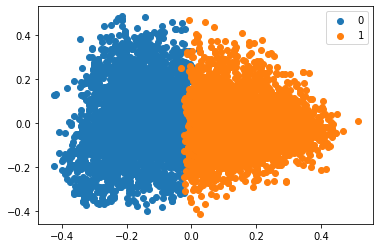

In [100]:
clusters = kmeans.labels_.tolist()
u_labels = np.unique(clusters)

for i in u_labels:
    plt.scatter(df_new[clusters == i, 0], df_new[clusters == i, 1], label=i)

plt.legend()
plt.show()